# Exploring and Processing the Data

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('housepricedata.csv')

In [ ]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [ ]:
dataset = df.values

In [ ]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [ ]:
X = dataset[:,0:10]
Y = dataset[:,10]

In [ ]:
from sklearn import preprocessing

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [ ]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [ ]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


# Building and Training Our First Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [ ]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 11ms/step - loss: 0.6710 - accuracy: 0.5098 - val_loss: 0.6809 - val_accuracy: 0.4612
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6664 - accuracy: 0.5098 - val_loss: 0.6765 - val_accuracy: 0.4612
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6619 - accuracy: 0.5098 - val_loss: 0.6719 - val_accuracy: 0.4612
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6572 - accuracy: 0.5108 - val_loss: 0.6669 - val_accuracy: 0.4658
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6524 - accuracy: 0.5323 - val_loss: 0.6620 - val_accuracy: 0.5114
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6475 - accuracy: 0.5665 - val_loss: 0.6569 - val_accuracy: 0.5799
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6424 - accuracy: 0.6389 - val_loss: 0.6520 - val_accuracy: 0.6347
Epoch 8/100


Evaluating our data on the test set:

In [ ]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 3ms/step - loss: 0.3132 - accuracy: 0.8676


0.8675799369812012

# Visualizing Loss and Accuracy

In [ ]:
import matplotlib.pyplot as plt

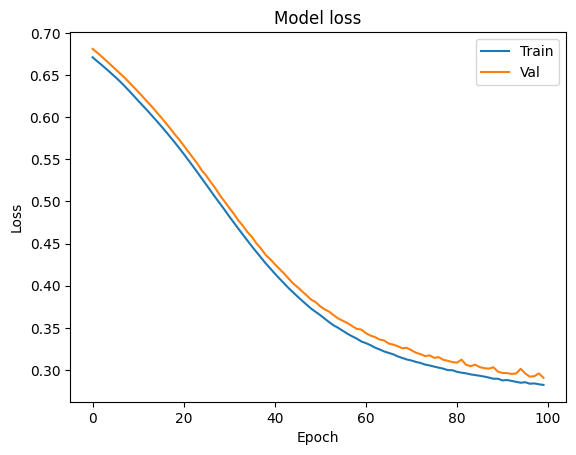

In [ ]:
# model loss visualise
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

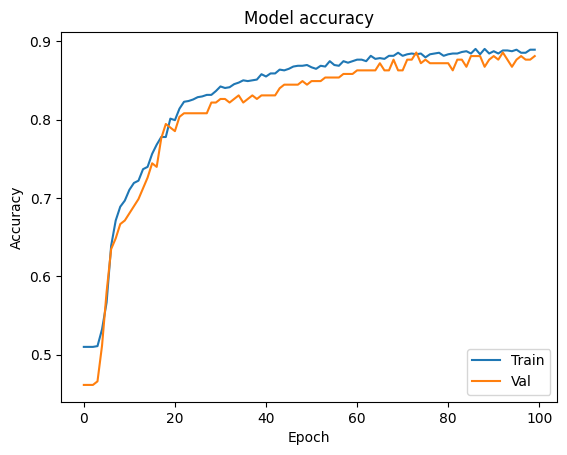

In [ ]:
# model accuracy visualise
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# Adding Regularization to our Neural Network

We'll train a model which will overfit, which we call Model 2.

In [ ]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 3s 62ms/step - loss: 0.4451 - accuracy: 0.7769 - val_loss: 0.3587 - val_accuracy: 0.8539
Epoch 2/100
32/32 [==============================] - 2s 64ms/step - loss: 0.3643 - accuracy: 0.8464 - val_loss: 0.3138 - val_accuracy: 0.8584
Epoch 3/100
32/32 [==============================] - 2s 72ms/step - loss: 0.3358 - accuracy: 0.8699 - val_loss: 0.2787 - val_accuracy: 0.8767
Epoch 4/100
32/32 [==============================] - 3s 83ms/step - loss: 0.2801 - accuracy: 0.8826 - val_loss: 0.2543 - val_accuracy: 0.8721
Epoch 5/100
32/32 [==============================] - 2s 62ms/step - loss: 0.2666 - accuracy: 0.8943 - val_loss: 0.3690 - val_accuracy: 0.8219
Epoch 6/100
32/32 [==============================] - 2s 60ms/step - loss: 0.2702 - accuracy: 0.8875 - val_loss: 0.2436 - val_accuracy: 0.8858
Epoch 7/100
32/32 [==============================] - 2s 65ms/step - loss: 0.2679 - accuracy: 0.8894 - val_loss: 0.2770 - val_accuracy: 0.8904
Epoch 

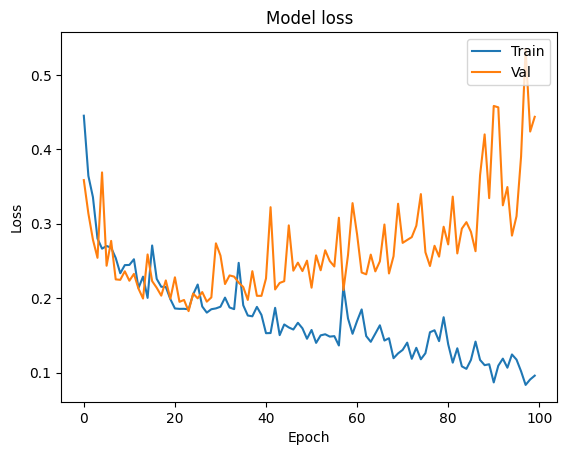

In [ ]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

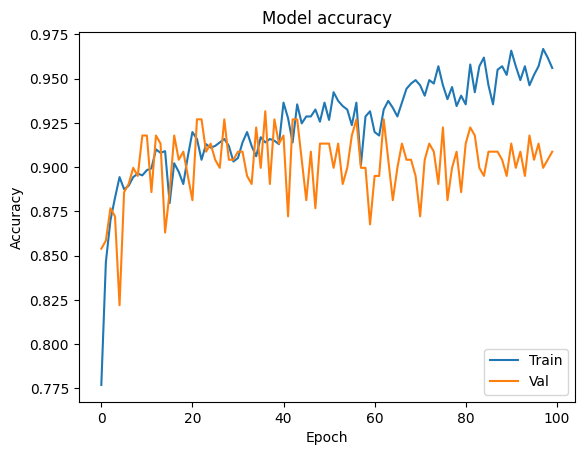

In [ ]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

To address the overfitting we see in Model 2, we'll incorporate L2 regularization and dropout in our third model here (Model 3).

In [ ]:
from keras.layers import Dropout
from keras import regularizers

In [ ]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [ ]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 5s 77ms/step - loss: 14.2637 - accuracy: 0.5812 - val_loss: 3.9320 - val_accuracy: 0.8447
Epoch 2/100
32/32 [==============================] - 2s 70ms/step - loss: 1.6883 - accuracy: 0.8337 - val_loss: 0.7074 - val_accuracy: 0.8265
Epoch 3/100
32/32 [==============================] - 2s 65ms/step - loss: 0.5763 - accuracy: 0.8581 - val_loss: 0.5498 - val_accuracy: 0.8311
Epoch 4/100
32/32 [==============================] - 2s 71ms/step - loss: 0.5121 - accuracy: 0.8650 - val_loss: 0.4906 - val_accuracy: 0.8721
Epoch 5/100
32/32 [==============================] - 3s 88ms/step - loss: 0.5078 - accuracy: 0.8611 - val_loss: 0.4816 - val_accuracy: 0.8767
Epoch 6/100
32/32 [==============================] - 3s 78ms/step - loss: 0.4807 - accuracy: 0.8748 - val_loss: 0.4636 - val_accuracy: 0.8858
Epoch 7/100
32/32 [==============================] - 2s 71ms/step - loss: 0.4660 - accuracy: 0.8885 - val_loss: 0.5066 - val_accuracy: 0.8493
Epoch

We'll now plot the loss and accuracy graphs for Model 3. You'll notice that the loss is a lot higher at the start, and that's because we've changed our loss function. To plot such that the window is zoomed in between 0 and 1.2 for the loss, we add an additional line of code (plt.ylim) when plotting

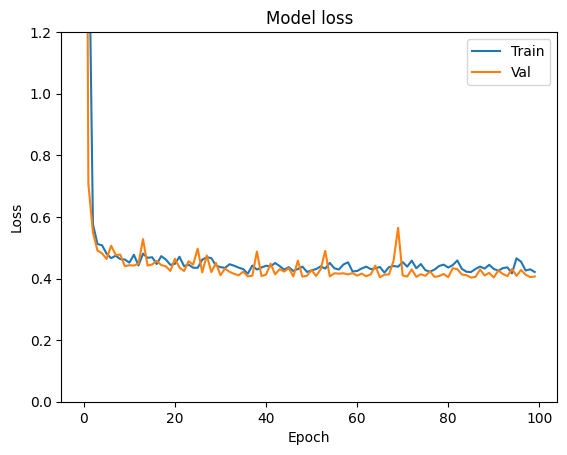

In [ ]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

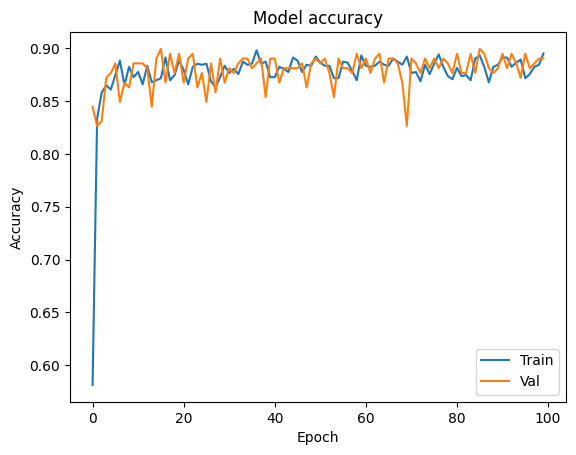

In [ ]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

As compared to Model 2, you should see that there's less overfitting!